In [493]:
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [494]:
tree = ET.parse('offers.xml')
root = tree.getroot()

shop = root.find('shop')
offers = shop.findall('offers/offer')

products = []
for offer in offers:
    product = {
        'id': offer.get('id'),
        'name': offer.find('name').text,
        'price': float(offer.find('price').text),
        'vendor': offer.find('vendor').text,
    }
    products.append(product)

In [495]:
# Генерация данных о продажах
np.random.seed(int(time()))
sales_data = {}
for product in products:
    mean = np.random.uniform(50, 200)
    std = np.random.uniform(10, 30)
    sales = np.random.normal(mean, std, 12)
    sales = np.clip(sales, 0, None)
    sales_data[product['id']] = sales

In [496]:
# Обучение моделей и прогноз
models = {}
predictions = {}
metrics = {}

for product in products:
    product_id = product['id']
    sales = sales_data[product_id]
    X = np.arange(1, 13).reshape(-1, 1)
    y = sales
    
    model = LinearRegression().fit(X, y)
    next_month = np.array([[13]])
    pred = model.predict(next_month)
    
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    models[product_id] = model
    predictions[product_id] = pred
    metrics[product_id] = {'mse': mse, 'mae': mae, 'r2': r2}

# Вывод метрик качества
for product in products:
    product_id = product['id']
    name = product['name']
    print(f"Product: {name}")
    print(f"  MSE: {metrics[product_id]['mse']:.2f}")
    print(f"  MAE: {metrics[product_id]['mae']:.2f}")
    print(f"  R²: {metrics[product_id]['r2']:.2f}")
    print(f"  Next month forecast: {predictions[product_id][0]:.1f}")
    print()

Product: Куртка зимняя Tundra Pro
  MSE: 425.22
  MAE: 17.37
  R²: 0.01
  Next month forecast: 159.9

Product: Брюки летние LightBreeze
  MSE: 194.94
  MAE: 10.89
  R²: 0.05
  Next month forecast: 188.4

Product: Футболка Basic Cotton
  MSE: 107.23
  MAE: 8.84
  R²: 0.01
  Next month forecast: 155.3

Product: Ветровка CityWind
  MSE: 63.06
  MAE: 6.07
  R²: 0.22
  Next month forecast: 101.2

Product: Платье Elegant Night
  MSE: 187.11
  MAE: 11.56
  R²: 0.08
  Next month forecast: 94.0



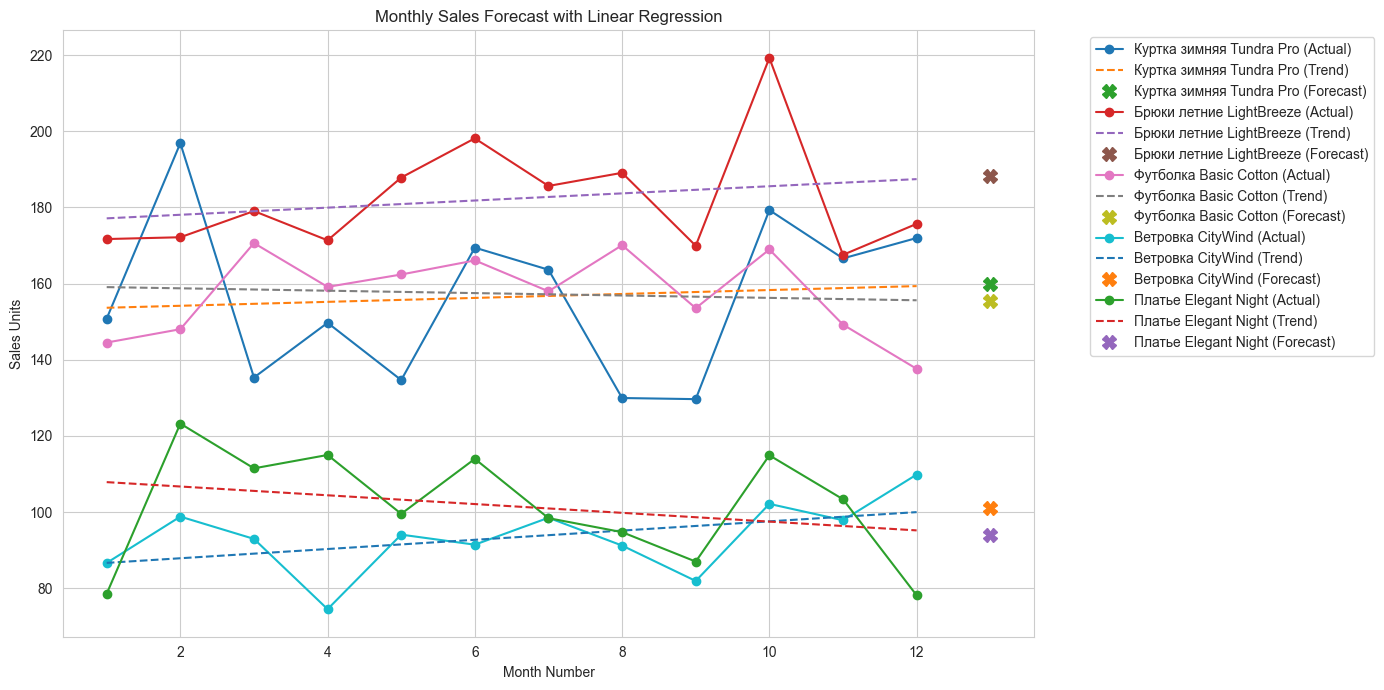

In [498]:
# Визуализация
plt.figure(figsize=(14, 7))
months = np.arange(1, 13)
next_month = 13

for product in products:
    product_id = product['id']
    name = product['name']
    sales = sales_data[product_id]
    model = models[product_id]
    
    plt.plot(months, sales, 'o-', label=f'{name} (Actual)')
    plt.plot(months, model.predict(months.reshape(-1, 1)), '--', label=f'{name} (Trend)')
    plt.plot(next_month, predictions[product_id], 'X', markersize=10, label=f'{name} (Forecast)')

plt.title('Monthly Sales Forecast with Linear Regression')
plt.xlabel('Month Number')
plt.ylabel('Sales Units')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()